In [1]:
# Import stuff: 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
from sympy import Symbol
from sympy.solvers import solve

fs_label = 16
parameters = {                
                'figure.titlesize': fs_label+6,
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.linewidth': 6
             }
plt.rcParams.update(parameters)

In [2]:
# Question 1.

# Parameters

# What is our model animal that is getting harvested?
# Our model animal is crayfish in a lake

K = 1000 # Carrying capacity # Unit: [no. animals/ km^2]   
b = 10/5 # Birth rate # Unit: [1 / year]
d = 1/5 # Death rate # Unit: [1 / year]
r = b-d # Growth rate # Unit: [1 / year] # r = 1.8
par = (r, K) # put parameters in tuple

N0 = 100 # Initial population   # Unit: [no. animals/ km^2]

t = np.linspace(0, 10, 100) # in years

In [3]:
# # -------- Simple logistic equation ---------
def deriv(N, t, r, K):
    return r*N*(1-(N/K))

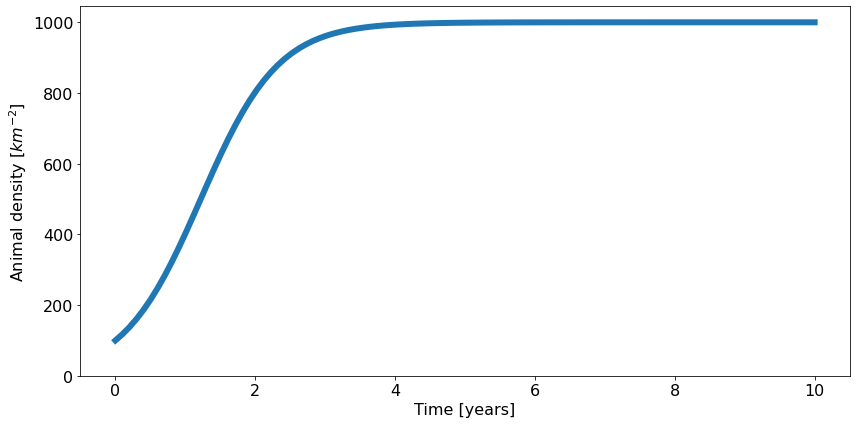

In [4]:
ns_lg = odeint(deriv, N0, t, args=par) # numerical solution of logistic growth

fig, ax = plt.subplots(1,1, figsize=(12, 6), tight_layout=True)
ax.plot(t, ns_lg)
ax.set_ylim(bottom=0)
ax.set_ylabel('Animal density $\\left[km^{-2}\\right]$') 
ax.set_xlabel('Time [years]')
plt.show()

In [11]:
# # -------- Logistic equation with exploitation factor---------
def deriv_e(N, t, r, K, E):
    return r*N*(1-(N/K))-E*N

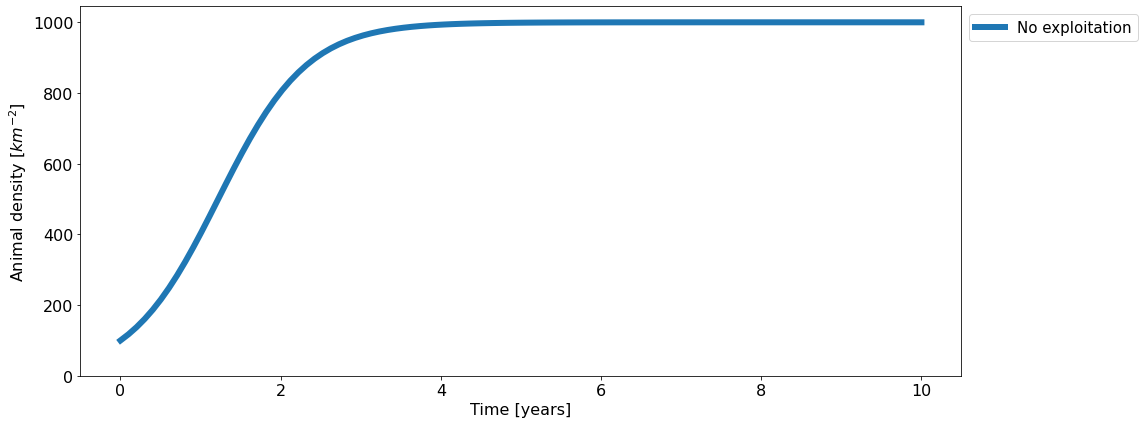

In [12]:
# Parameters: 
K = 1000 # Carrying capacity # Unit: [no. animals/ km^2]   
b = 10/5 # Birth rate # Unit: [1 / year]
d = 1/5 # Death rate # Unit: [1 / year]
r = b-d # Growth rate # Unit: [1 / year] # r = 1.8
N0 = 100 # Initial population   # Unit: [no. animals/ km^2]
t = np.linspace(0, 10, 100) # in years
E = 0 # Effort # No exploitation  # Unit: [1/year]
par = (r, K, E)

ns_e0 = odeint(deriv_e, N0, t, args=par) # numerical solution for exploitation 0

fig, ax = plt.subplots(1,1, figsize=(16, 6), tight_layout=True)
ax.plot(t, ns_e0,  label = 'No exploitation')
ax.set_ylim(bottom=0)
ax.set_ylabel('Animal density $\\left[km^{-2}\\right]$') 
ax.set_xlabel('Time [years]')
ax.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.5, fontsize=15) 
plt.show()

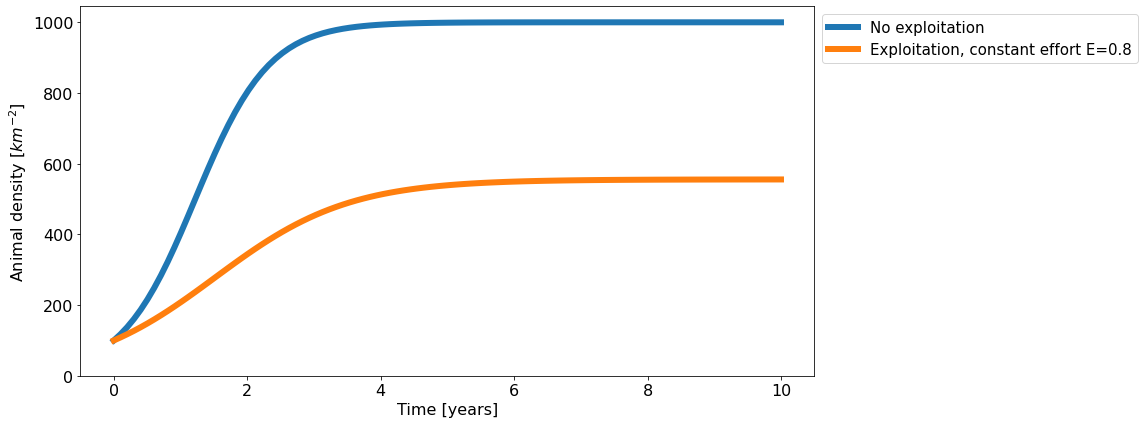

In [13]:
# Parameters: 
K = 1000 # Carrying capacity # Unit: [no. animals/ km^2]   
b = 10/5 # Birth rate # Unit: [1 / year]
d = 1/5 # Death rate # Unit: [1 / year]
r = b-d # Growth rate # Unit: [1 / year] # r = 1.8
N0 = 100 # Initial population   # Unit: [no. animals/ km^2]
t = np.linspace(0, 10, 100) # in years
E = 0.8 # Effort # Exploitation  # Unit: [1/year]
par = (r, K, E)

ns_e1 = odeint(deriv_e, N0, t, args=par) # numerical solution for exploitation

fig, ax = plt.subplots(1,1, figsize=(16, 6), tight_layout=True)
ax.plot(t, ns_e0, label = 'No exploitation')
ax.plot(t, ns_e1,  label = 'Exploitation, constant effort E=0.8')
ax.set_ylim(bottom=0)
ax.set_ylabel('Animal density $\\left[km^{-2}\\right]$') 
ax.set_xlabel('Time [years]')
ax.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.5, fontsize=15) 
plt.show()

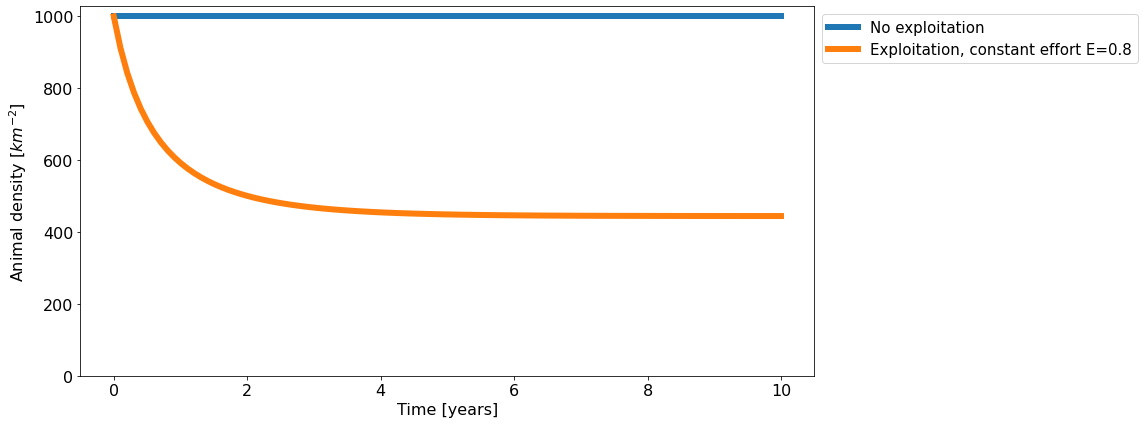

Steady state at density [444.5272897]


In [24]:
# Question 2: Consider N0 = K, and constant effort E. How does population size vary as function of time? 

# Parameters: 
K = 1000 # Carrying capacity # Unit: [no. animals/ km^2]   
b = 10/5 # Birth rate # Unit: [1 / year]
d = 1/5 # Death rate # Unit: [1 / year]
r = b-d # Growth rate # Unit: [1 / year] # r = 1.8
N0 = K # Initial population equal to Carrying capacity  # Unit: [no. animals/ km^2]
t = np.linspace(0, 10, 100) # in years
E = 0.8 # Effort # Exploitation  # Unit: [1/year]
par = (r, K, E)

E = 0
par = (r, K, E)
ns_e0 = odeint(deriv_e, N0, t, args=par) # numerical solution for exploitation

E = 1
par = (r, K, E)
ns_e1 = odeint(deriv_e, N0, t, args=par) # numerical solution for exploitation

fig, ax = plt.subplots(1,1, figsize=(16, 6), tight_layout=True)
ax.plot(t, ns_e0, label = 'No exploitation')
ax.plot(t, ns_e1,  label = 'Exploitation, constant effort E=0.8')
ax.set_ylim(bottom=0)
ax.set_ylabel('Animal density $\\left[km^{-2}\\right]$') 
ax.set_xlabel('Time [years]')
ax.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.5, fontsize=15) 
plt.show()
print(f'Steady state at density {min(ns_e1)}')

# The population decreases during the first 4 years (transient phase), 
    # and stabilizes at approximately 500 individuals/sqkm for the rest of simulated time

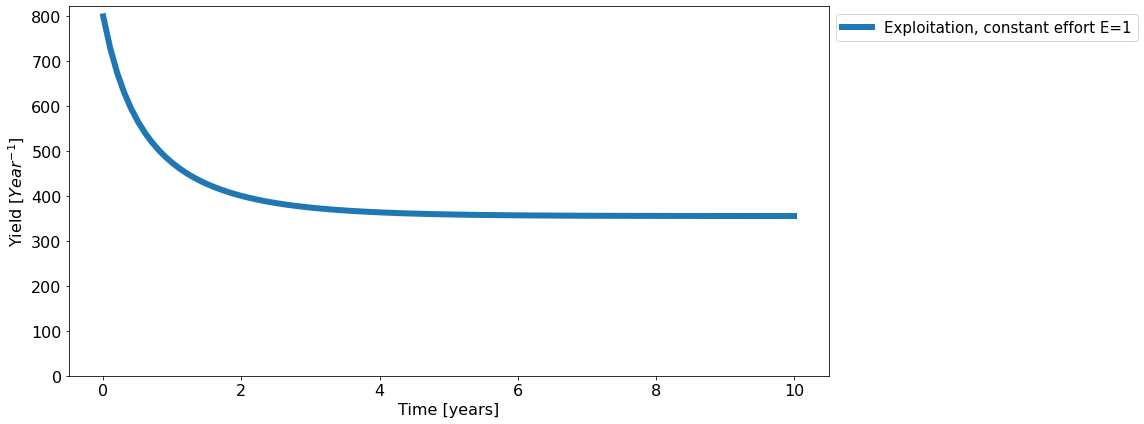

Steady state at yield [355.62183176]


In [25]:
# Question 3: How does yield vary with time?
# Since the effort is constant and Y = E * N, the yield will get smaller as the population decreases,
     # and will reach a steady state after 4 years

E=0.8
fig, ax = plt.subplots(1,1, figsize=(16, 6), tight_layout=True)
ax.plot(t, ns_e1*E,  label = 'Exploitation, constant effort E=1')
ax.set_ylim(bottom=0)
ax.set_ylabel('Yield $\\left[Year^{-1}\\right]$') 
ax.set_xlabel('Time [years]')
ax.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.5, fontsize=15) 
plt.show()

print(f'Steady state at yield {min(ns_e1*E)}')

In [32]:
# Question 4. Does equilibrium population size and yeld converge to the exact analytical equilibrium?

# Analytical solutions for steady states:
# Solve for the equilibrium abundances of prey and predator
Ns = Symbol('Ns')
Nstar = solve([r*Ns*(1-(Ns/K))-E*Ns])
print(Nstar)

# No, for some reason the numerical equilibrium was at 444 individuals/sqkm

[{Ns: 0.0}, {Ns: 555.555555555556}]


In [33]:
Ns = Symbol('Ns')
rs = Symbol('rs')
Ks = Symbol('Ks')
Es = Symbol('Es')
Nstar_symb = solve([(rs*(1-(Ns/Ks))-Es)*Ns], Ns)
print(Nstar_symb)

[(0,), (-Ks*(Es - rs)/rs,)]


In [31]:
-K*(E - r)/r

555.5555555555555

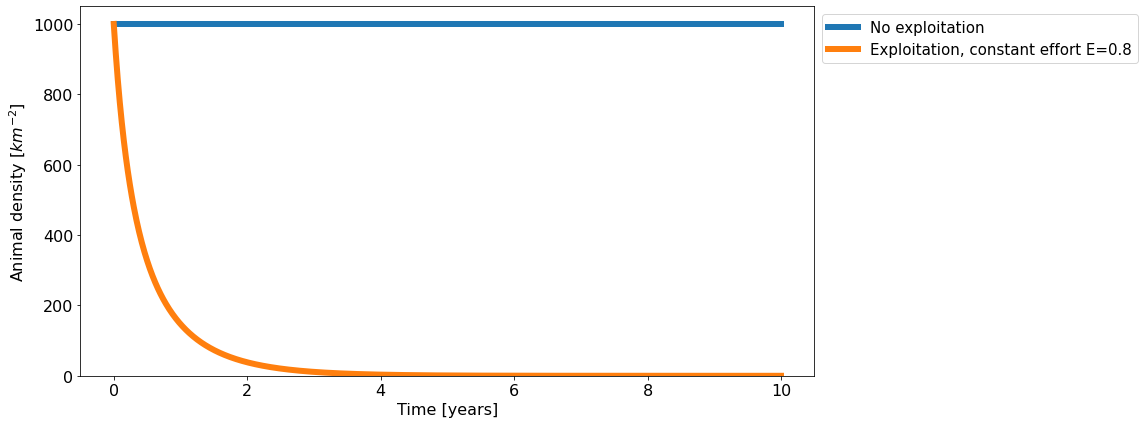

In [17]:
# What happens if E > r?
    # Population gets extinct!
    
# Parameters: 
K = 1000 # Carrying capacity # Unit: [no. animals/ km^2]   
b = 10/5 # Birth rate # Unit: [1 / year]
d = 1/5 # Death rate # Unit: [1 / year]
r = b-d # Growth rate # Unit: [1 / year] # r = 1.8
N0 = K # Initial population equal to Carrying capacity  # Unit: [no. animals/ km^2]
t = np.linspace(0, 10, 100) # in years
E = 0.8 # Effort # Exploitation  # Unit: [1/year]
par = (r, K, E)


N0 = K # Initial population equal to K
t = np.linspace(0, 10, 1000) # in years

E = 0
par = (r, K, E)
ns_e0 = odeint(deriv_e, N0, t, args=par) # numerical solution for exploitation

E = 3
par = (r, K, E)
ns_e1 = odeint(deriv_e, N0, t, args=par) # numerical solution for exploitation

fig, ax = plt.subplots(1,1, figsize=(16, 6), tight_layout=True)
ax.plot(t, ns_e0, label = 'No exploitation')
ax.plot(t, ns_e1,  label = 'Exploitation, constant effort E=0.8')
ax.set_ylim(bottom=0)
ax.set_ylabel('Animal density $\\left[km^{-2}\\right]$') 
ax.set_xlabel('Time [years]')
ax.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.5, fontsize=15) 
plt.show()

# The population decreases during the first 4 years (transient phase), 
    # and stabilizes at approximately 500 individuals/sqkm for the rest of simulated time

In [ ]:
# # -------- Logistic equation with exploitation and agents---------
# I took the symbols from Christian
# w: rate at which effort is increased # Unit: [no. agents/sqkm/year] ==> same as dA/dt, right? 
# b: clearance rate # Unit: [km^2/ year/ no. agents]
# p: price per catch # Unit: [dollar/ no. crayfish]
# C: cost of exploitation per agent per time # Unit [dollar/ no. agents/ year]

# PI = pbN - C # PI Unit [dollar/ no. agents/ year] ==> same as C and pbN, right?


